# Assignment 3 (OPTION A): Machine Learning
# I. LOOK AT THE BIG PICTURE AND DATA EXPLORATION
## 1.1 Look at the big picture

1. End goal of the project: 
The purpose of this ML project to train AI models to predict the selling price of each car depending on their conditions. The end goal is to help businesses understand the market trend and produce new profitable products in the future. It also helps to analyze consumer behavior and predict the performance of past products.

2. Algorithm:
The algorithm to use is supervised regression.

3. Performance Measure:
* RMSE
* R2 Score

4. Collected Data:
The data is already collected from the lecturer.
The dataset is about car retails.

## 1.2 Data Exploration: Get the data

In [1]:
# In[0]: IMPORT AND FUNCTIONS
#region 
# pip install scikit-learn # to install sklearn
# pip install xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold   
from statistics import mean
import joblib 
import os
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

In [2]:

# In[2]: STEP 2. GET THE DATA (DONE). LOAD DATA
datasets_folder = 'datasets'
file_name = 'CarDetailsV3.csv'

file_path = os.path.join(datasets_folder, file_name)

raw_data = pd.read_csv(file_path)



### Our label data is selling_price with the datatype int64. 


### Overview of the dataset
The table above shows that there are 8128 rows. However, there are some missing values in s, engine, max_power, torque, seats.

## 1.3: Scatter plot between 2 features
### Feature selections:
To approach this regression problem and focus on predicting the price, features that are suspected to have an impactful correlation raking from high to low:
1. Kilometers Driven (km_driven)
2. The year the car was produced (year)
3. Fuel consumption (fuel)


In [20]:
# In[3]: STEP 3. DISCOVER THE DATA TO GAIN INSIGHTS
#region
# 3.1 Quick view of the data
print('\n____________ Dataset info ____________')
print(raw_data.info())      
print('\n____________ Some first data examples ____________')
print(raw_data.head(3)) 
print('\n____________ Counts on a feature of fuel ____________')
print(raw_data['fuel'].value_counts()) 
print('\n____________ Counts on a feature of seller_type ____________')
print(raw_data['seller_type'].value_counts()) 
print('\n____________ Counts on a feature of owner ____________')
print(raw_data['owner'].value_counts()) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())   
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,5,48], [2, 5]] ) # Refer using column ID 


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
 12  price_per_km   8128 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 825.6+ KB
None

____________ Some first data examples ____________
   year  selling_price  km_driven    fuel seller_type transmission  \
0 


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB
None

____________ Some first data examples ____________
                           name  year  selling_price  km_driven    fuel 

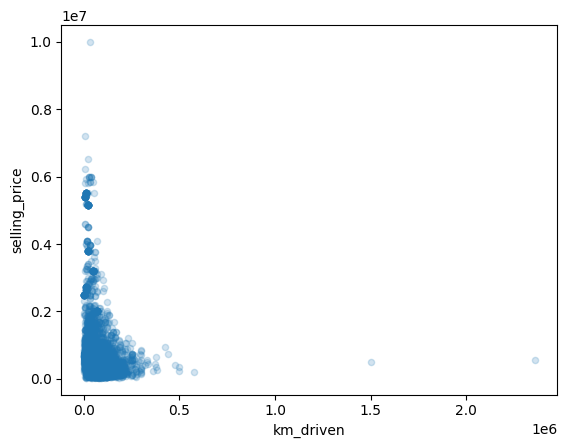

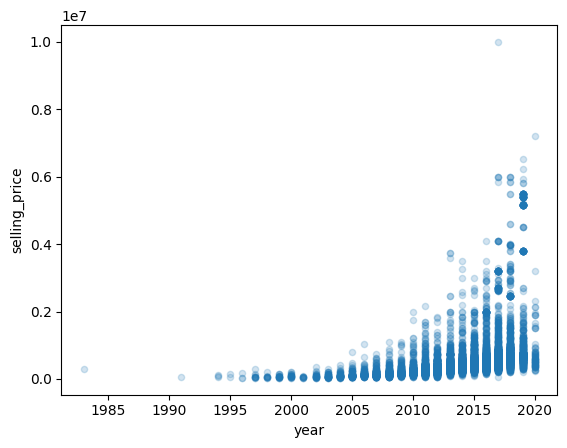

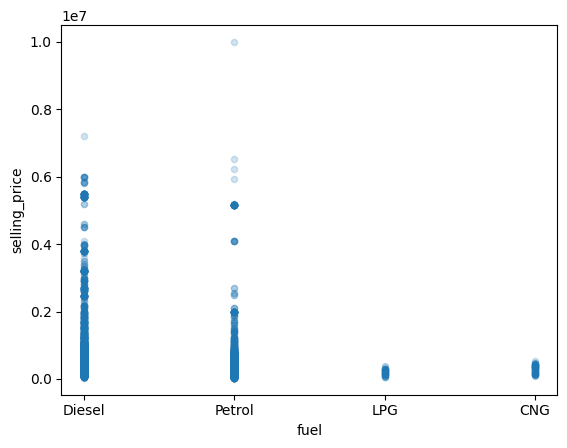

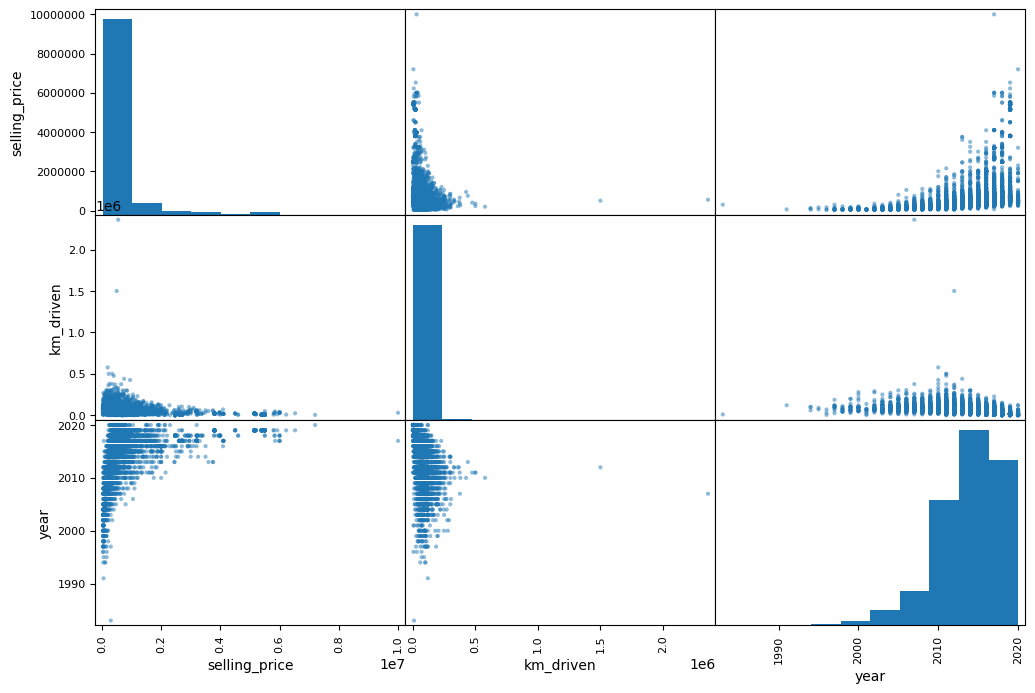

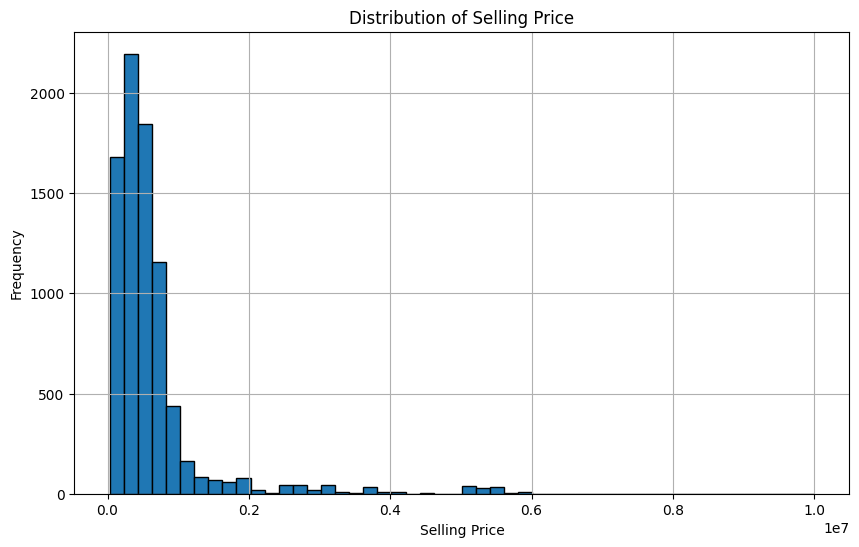


 selling_price    1.000000
year             0.414092
seats            0.041358
km_driven       -0.225534
Name: selling_price, dtype: float64
selling_price    1.000000
year             0.414092
seats            0.041358
price_per_km     0.024245
km_driven       -0.225534
Name: selling_price, dtype: float64


In [3]:

if 1:
    raw_data.plot(kind="scatter", y="selling_price", x="year", alpha=0.2)
    #plt.axis([0, 5, 0, 10000])
    #plt.savefig('figures/scatter_2_feat.png', format='png', dpi=300)
    plt.show()

if 1:
    raw_data.plot(kind="scatter", y="selling_price", x="fuel", alpha=0.2)
    #plt.axis([0, 5, 0, 10000])
    #plt.savefig('figures/scatter_2_feat.png', format='png', dpi=300)
    plt.show()

# 3.3 Scatter plot b/w every pair of features
if 1:
    from pandas.plotting import scatter_matrix   
    features_to_plot = ["selling_price", "km_driven", "year", "fuel"]
    scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
    # plt.savefig('figures/scatter_mat_all_feat.png', format='png', dpi=300)
    plt.show()

# 3.4 Plot histogram of 1 feature
# if 1:
#     from pandas.plotting import scatter_matrix   
#     features_to_plot = ["selling_price"]
#     scatter_matrix(raw_data[features_to_plot], figsize=(12, 8)) # Note: histograms on the main diagonal
#     plt.show()

if 1:
    # Plotting the distribution of the 'selling_price' feature
    plt.figure(figsize=(10, 6))
    plt.hist(raw_data['selling_price'], bins=50, edgecolor='black')
    plt.title('Distribution of Selling Price')
    plt.xlabel('Selling Price')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# 3.5 Plot histogram of numeric features
if 0:
    #raw_data.hist(bins=10, figsize=(10,5)) #bins: no. of intervals
    raw_data.hist(figsize=(10,5)) #bins: no. of intervals
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    plt.tight_layout()
    # plt.savefig('figures/hist_raw_data.png', format='png', dpi=300) # must save before show()
    plt.show()

# 3.6 Compute correlations b/w features
corr_matrix = raw_data.corr(numeric_only=True)
#print(corr_matrix) # print correlation matrix
print('\n',corr_matrix["selling_price"].sort_values(ascending=False)) # print correlation b/w a feature and other features

# # 3.7 Try combining features
raw_data["price_per_km"] = raw_data["selling_price"] / raw_data["km_driven"]
corr_matrix = raw_data.corr(numeric_only=True)
print(corr_matrix["selling_price"].sort_values(ascending=False)) # print correlation b/w a feature and other features
#raw_data.drop(columns=["price_per_km"], inplace=True) # remove experiment columns


## Explanation and Analysis 
## Scatter Plot between 2 features
### Relationship between selling_price and km_driven
Most data lies in the bottom left corner. Most vehicles have been driven less than 50,000 units and the selling prices are between 0 to 600,000 units.
Outliers of extremely high km_driven and extremely high prices are available.

They have an negative linear correlation which indicates that as the amount of km_driven increases, the selling prices tend to decrease exponentially. This means that cars with high km_driven tend to be sold with a lower price.
<br>

### Relationship between selling_price and year 

Most data lies at the bottom right of the plot. Most vehicles were produced before year 1995.

They have a positive linear relationship which indicates as the production year increases, the price also increases. This means that newer cars are sold with higher prices.
<br>

### Relationship between selling_price and fuel 

Most vehicles use Diesel and Petrol as their fuel which a minority of them use LPG and CNG.

Diesel has the biggest spread with some cars reach the top selling prices. However, majority are still at the bottom with a low selling price.

Petrol has one outlier with the highest selling price but the spread was less and data mostly lie at the lower price.

LPG and CNG have no outliers and data lies in the lower range which is below 100,000 units.

Ranking from high to low selling price:
1. Diesel
2. Petrol
3. CNG
4. LPG

## Scatter plot between selling_price and other features
A few insights gain from this plot: <br>
### About km_driven
* Very low km_driven vehicles (close to 0 km driven) seem to command a premium, with some of the highest prices in this category.
* There are some very old vehicles ( before year 2000) with extremely low km_driven, which could be classic or collector cars.
Conversely, there are some relatively new vehicles with unusually high km_driven, possibly indicating commercial use or long-distance drivers.

### About year
* The highest frequency appears to be for the most recent years, from 2018 to 2020.
* Recent cars before 2015 show a tight cluster of low km_driven, while older cars have a much wider spread of km_driven.

## Distribution Histogram
The highest frequency comes from vehicle with the selling price of 200,000 units and the lowest frequency is vehicle with the price of  500,000 units.
Most vehicles lie between 0 to 2,000,000 units of selling price. Above 2,000,000 units, there are only few outliers.
Tha majority of outliers are located in the approximate range of 300,000 units and 500,000 units.

## Correlation coefficients between selling_price and other variables 

1. selling_price to year (0.414092): <br>
Moderate positive correlation which means higher year has higher selling prices.
<br>
2. selling_price to seat (0.041358): <br>
Weak positive correlation which means number of seats has minimal relationship with selling price. However, more seats could slightly increase the price.
<br>

3. selling_price to km_driven (-0.22553): <br>
Weak negative correlation which means higher km_driven has lower selling price. However, the correlation is quite weak so this cannot be taken as a trend.
<br>

4. selling_price to price_per_km (0.024245): <br>
Weak positive correlation which means this new combination does not significantly affect the selling price.
<br>

## Generally:
year is the strongest predictor of selling price, while km_drive is the weakest factor.



In [4]:
# In[4]: STEP 4. PREPARE THE DATA 
#region
# 4.1 Remove unused features
if "name" in raw_data.columns:
    raw_data.drop(columns=["name"], inplace=True)

raw_data.info()

# [EXERCISE] To remove outliner rows:
# NOTE: Can improve RMSE to lower than 1000.

# ADD YOUR CODE HERE

Q1 = raw_data['selling_price'].quantile(0.04)
Q3 = raw_data['selling_price'].quantile(0.96)
IQR = Q3 - Q1

# Define a threshold for what counts as an outlier (usually 1.5 times the IQR)
threshold = 1.5

# Remove outliers
filtered_data = raw_data[(raw_data['selling_price'] >= Q1 - threshold * IQR) & 
                         (raw_data['selling_price'] <= Q3 + threshold * IQR)]

#%% 4.2 Split training-test set and NEVER touch test set until test phase
method = 1 #********
if method == 1: # Method 1: Randomly select 20% of data for test set. Used when data set is large
    from sklearn.model_selection import train_test_split
    train_set, test_set = train_test_split(filtered_data, test_size=0.1, random_state=42) # set random_state to get the same training set all the time, 
                                                                                     # otherwise, when repeating training many times, your model may see all the data
elif method == 2: # Method 2: Stratified sampling, to remain distributions of important features, see (Geron, 2019) page 56
    # Create new feature "PRICE RANGE": the distribution we want to remain
    filtered_data["SELLING PRICE RANGE"] = pd.cut(filtered_data["selling_price"],
                                    bins=[0, 200000, 400000, 600000, 800000, np.inf],
                                    #labels=["<2 bil VND", "2-4 bil VND", "4-6 bil VND", "6-8 bil VND", "8-10 bil VND", ">10 bil VND"])
                                    labels=[2,4,6,8,100]) # use numeric labels to plot histogram
    
    # Create training and test set
    from sklearn.model_selection import StratifiedShuffleSplit  
    splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.125, random_state=42) # n_splits: no. of re-shuffling & splitting = no. of train-test sets 
                                                                                  # (if you want to run the algorithm n_splits times with different train-test set)
    for train_index, test_index in splitter.split(filtered_data, filtered_data["SELLING PRICE RANGE"]): # Feature "PRICE RANGE" must NOT contain NaN
        train_set = filtered_data.iloc[train_index]
        test_set = filtered_data.iloc[test_index]              
    
    # See if it worked as expected
    if 1:
        filtered_data["SELLING PRICE RANGE"].hist(bins=6, figsize=(5,5)); #plt.show();
        train_set["SELLING PRICE RANGE"].hist(bins=6, figsize=(5,5)); plt.show()

    # Remove the new feature
    #print(train_set.info())
    for _set_ in (train_set, test_set):
        #_set_.drop("income_cat", axis=1, inplace=True) # axis=1: drop cols, axis=0: drop rows
        _set_.drop(columns="SELLING PRICE RANGE", inplace=True) 
    #print(train_set.info())
    #print(test_set.info())
print('\n____________ Split training and test set ____________')     
print(len(train_set), "training +", len(test_set), "test examples")
print(train_set.head(4))

#%% 4.3 Separate labels from data, since we do not process label values
train_set_labels = train_set["selling_price"].copy()
train_set = train_set.drop(columns = "selling_price") 
test_set_labels = test_set["selling_price"].copy()
test_set = test_set.drop(columns = "selling_price") 

#%% 4.4 Define pipelines for processing data. 
# INFO: Pipeline is a sequence of transformers (see Geron 2019, page 73). For step-by-step manipulation, see Details_toPipeline.py 

# 4.4.1 Define ColumnSelector: a transformer for choosing columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_names):
        self.feature_names = feature_names
    def fit(self, dataframe, labels=None):
        return self
    def transform(self, dataframe):
        return dataframe[self.feature_names].values         

num_feat_names = ['year', 'km_driven', 'seats'] # =list(train_set.select_dtypes(include=[np.number]))
cat_feat_names = ['fuel', 'seller_type', 'owner'] # =list(train_set.select_dtypes(exclude=[np.number])) 

# 4.4.2 Pipeline for categorical features
cat_pipeline = Pipeline([
    ('selector', ColumnSelector(cat_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "NO INFO", copy=True)), # complete missing values. copy=False: imputation will be done in-place 
    ('cat_encoder', OneHotEncoder()) # convert categorical data into one-hot vectors
    ])    

# INFO: Try the code below to understand how a pipeline works
if 1:
    trans_feat_values_1 = cat_pipeline.fit_transform(train_set)

    # The above line of code is equavalent to the following code:     
    selector  = ColumnSelector(cat_feat_names)
    temp_feat_values = selector.fit_transform(train_set) 
    imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "NO INFO", copy=True)
    temp_feat_values = imputer.fit_transform(temp_feat_values) 
    one_hot_encoder = OneHotEncoder()
    trans_feat_values_2 = one_hot_encoder.fit_transform(temp_feat_values)
    if 1: 
        # See the encoded features
        print(one_hot_encoder.categories_) # INFO: categories_ is an array of array: categories_[0] is the array of feature 1, categories_[1] is the array of feature 2,...
        # NOTE: OneHotEncoder turns 1 features into N features, where N is the no. of values in that feature
        # e.g., feature "ORIENTATION" having 5 values 'Đông', 'Tây', 'Nam', 'Bắc', 'NO INFO', will become 5 features corresponding with its values 
        print(one_hot_encoder.get_feature_names_out(cat_feat_names))
        print("No. of one-hot columns: " + str(one_hot_encoder.get_feature_names_out(cat_feat_names).shape[0]))
        print(trans_feat_values_2[[0,1,2],:].toarray()) # toarray() convert sparse to dense array
    
    # Check if trans_feat_values_1 and trans_feat_values_2 are the same
    #print(trans_feat_values_1.toarray() == trans_feat_values_2.toarray())
    print(np.array_equal(trans_feat_values_1.toarray(), trans_feat_values_2.toarray()))

# 4.4.3 Define MyFeatureAdder: a transformer for adding features "TOTAL NUMBER OF BEDROOMS",...  
class MyFeatureAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_TOTAL_NO_OF_ROOMS = True): # MUST NO *args or **kargs
        self.add_TOTAL_NO_OF_ROOMS = add_TOTAL_NO_OF_ROOMS
    def fit(self, feature_values, labels = None):
        return self  # nothing to do here
    def transform(self, feature_values, labels = None):
        if self.add_TOTAL_NO_OF_ROOMS:        
            NO_OF_ROOMS_id, NO_OF_TOILETS_id = 1, 2 # column indices in num_feat_names. can't use column names b/c the transformer SimpleImputer removed them
            # NOTE: a transformer in a pipeline ALWAYS return dataframe.values (ie., NO header and row index)
            
            TOTAL_NO_OF_ROOMS = feature_values[:, NO_OF_ROOMS_id] + feature_values[:, NO_OF_TOILETS_id]
            feature_values = np.c_[feature_values, TOTAL_NO_OF_ROOMS] #concatenate np arrays
        return feature_values

# 4.4.4 Pipeline for numerical features
num_pipeline = Pipeline([
    ('selector', ColumnSelector(num_feat_names)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median", copy=True)), # copy=False: imputation will be done in-place 
    ('attribs_adder', MyFeatureAdder(add_TOTAL_NO_OF_ROOMS = True)),
    ('std_scaler', StandardScaler(with_mean=True, with_std=True, copy=True)) # Scale features to zero mean and unit variance
    ])  
  
# 4.4.5 Combine features transformed by two above pipelines
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline) ])  


# 4.5 Run the pipeline to process training data           
processed_train_set_val = full_pipeline.fit_transform(train_set)
print('\n____________ Processed feature values ____________')
print(processed_train_set_val[[0, 1, 2],:].toarray())
print(processed_train_set_val.shape)
print('We have %d numeric feature + 1 added features + 35 cols of onehotvector for categorical features.' %(len(num_feat_names)))
# Create the 'models/' directory if it doesn't exist
os.makedirs('models', exist_ok=True)
joblib.dump(full_pipeline, r'models/full_pipeline.pkl')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage        7907 non-null   object 
 8   engine         7907 non-null   object 
 9   max_power      7913 non-null   object 
 10  torque         7906 non-null   object 
 11  seats          7907 non-null   float64
 12  price_per_km   8128 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 825.6+ KB

____________ Split training and test set ____________
7311 training + 813 test examples
      year  selling_price  km_driven    fuel       seller_type transmission  \
4

['models/full_pipeline.pkl']

# III. Model Training and Evaluation:

In this project, there are 7 models: 
- Linear Regression model
- Decision Tree Regressor model
- Random Forest Regressor model
- Polinomial Regression model
- Support Vector Regression (SVR)
- Gradient Boosting Regressor 
- XGBoost Regressior


Besides, each model will be evaluated by 2 performance measures that are R2-score and RMSE (Root Mean Squared Error)

In [5]:
# In[5]: STEP 5. TRAIN AND EVALUATE MODELS 
#region
# 5.1.2 Compute R2 score and root mean squared error
def r2score_and_rmse(model, train_data, labels): 
    r2score = model.score(train_data, labels)
    from sklearn.metrics import mean_squared_error
    prediction = model.predict(train_data)
    mse = mean_squared_error(labels, prediction)
    rmse = np.sqrt(mse)
    return r2score, rmse 

# 5.1.4 Store models to files, to compare latter
#from sklearn.externals import joblib 
import joblib # new lib
def store_model(model, model_name = ""):
    # NOTE: sklearn.joblib faster than pickle of Python
    # INFO: can store only ONE object in a file
    if model_name == "": 
        model_name = type(model).__name__
    joblib.dump(model,'models/' + model_name + '_model.pkl')
def load_model(model_name):
    # Load objects into memory
    #del model
    model = joblib.load('models/' + model_name + '_model.pkl')
    #print(model)
    return model

print("\nInput data: \n", train_set.iloc[0:9])



Input data: 
       year  km_driven    fuel       seller_type transmission  \
4752  2009     242000  Diesel        Individual       Manual   
3028  2017      23511  Petrol        Individual       Manual   
3759  2015      85000  Diesel            Dealer       Manual   
6171  2016      68089  Petrol  Trustmark Dealer    Automatic   
6285  2016      66000  Diesel            Dealer       Manual   
4196  2019      10000  Diesel        Individual    Automatic   
3100  2018      38817  Diesel            Dealer       Manual   
5628  2019       7500  Diesel            Dealer    Automatic   
1316  2005     150000  Petrol        Individual       Manual   

                     owner     mileage   engine   max_power  \
4752  Fourth & Above Owner   12.8 kmpl  2494 CC     102 bhp   
3028           First Owner   18.6 kmpl  1197 CC   81.83 bhp   
3759           First Owner   25.8 kmpl  1498 CC    98.6 bhp   
6171           First Owner  19.16 kmpl  2494 CC   157.7 bhp   
6285           First Owner  2

## A. Model Training
### 1. Linear Regression model


In [6]:

# 5.1 Try Linear Regression model
# 5.1.1 Training: learn a linear regression hypothesis using training data 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ LinearRegression ____________')
print('Learned parameters: ', model.coef_, model.intercept_)
     
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
        
# 5.1.3 Predict labels for some training instances
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))
store_model(model)



____________ LinearRegression ____________
Learned parameters:  [ 227908.39382247  -37915.05072535   15809.81304564  -37914.65070835
 -166587.73670426  248498.75530824   -5360.9436623   -76550.07494195
  372101.91339267 -300190.8767743   -71911.03661778 -324479.30887924
 -264053.02154676 -373984.70460656 1260826.02404264 -298308.98900968] 1063849.244888478

R2 score (on training data, best=1): 0.31580729722174283
Root Mean Square Error:  641283.5

Predictions:  [ 274868.   598848.1 1401445.3  711485.9 1516553.6 1088524.1 1632743.3
 1730871.6 -223252.4]
Labels:       [650000, 625000, 450000, 2000000, 725000, 2700000, 740000, 5400000, 150000]


### 2. Dicision Tree Regressor model

In [7]:
#%% 5.2 Try Decision Tree Regressor model
# Training
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(processed_train_set_val, train_set_labels)
# Compute R2 score and root mean squared error
print('\n____________ DecisionTreeRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ DecisionTreeRegressor ____________

R2 score (on training data, best=1): 0.9328613251947067
Root Mean Square Error:  200884.9

Predictions:  [ 650000.  625000.  450000. 2000000.  725000. 1850000.  740000. 5416000.
  150000.]
Labels:       [650000, 625000, 450000, 2000000, 725000, 2700000, 740000, 5400000, 150000]


### 3. Random Forest Regressor model

In [8]:
#%% 5.3 Try RandomForestRegressor model
# Training (NOTE: may take time if train_set is large)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 5) # n_estimators: no. of trees
model.fit(processed_train_set_val, train_set_labels)
# Compute R2 score and root mean squared error
print('\n____________ RandomForestRegressor ____________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)      
# Predict labels for some training instances
#print("Input data: \n", train_set.iloc[0:9])
print("\nPredictions: ", model.predict(processed_train_set_val[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))


____________ RandomForestRegressor ____________

R2 score (on training data, best=1): 0.9000509703443967
Root Mean Square Error:  245103.9

Predictions:  [ 485999.8  546333.3  462000.  2000000.   669000.  2041333.3  740000.
 5424130.8  108600. ]
Labels:       [650000, 625000, 450000, 2000000, 725000, 2700000, 740000, 5400000, 150000]


### 4. Polinomial Regression model

In [9]:
#%% 5.4 Try polinomial regression model
# NOTE: polinomial regression can be treated as (multivariate) linear regression where high-degree features x1^2, x2^2, x1*x2... are seen as new features x3, x4, x5... 
# hence, to do polinomial regression, we add high-degree features to the data, then call linear regression
# 5.5.1 Training. NOTE: may take a while 
from sklearn.preprocessing import PolynomialFeatures
poly_feat_adder = PolynomialFeatures(degree = 2) # add high-degree features to the data
train_set_poly_added = poly_feat_adder.fit_transform(processed_train_set_val)
new_training = 10
if new_training:
    model = LinearRegression()
    model.fit(train_set_poly_added, train_set_labels)
    store_model(model, model_name = "PolinomialRegression")      
else:
    model = load_model("PolinomialRegression")
# 5.4.2 Compute R2 score and root mean squared error
print('\n____________ Polinomial regression ____________')
r2score, rmse = r2score_and_rmse(model, train_set_poly_added, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 5.4.3 Predict labels for some training instances
print("\nPredictions: ", model.predict(train_set_poly_added[0:9]).round(decimals=1))
print("Labels:      ", list(train_set_labels[0:9]))



____________ Polinomial regression ____________

R2 score (on training data, best=1): 0.47373845587294194
Root Mean Square Error:  562421.2

Predictions:  [ 337219.6  538685.6  910203.6 1441694.7 1255832.9 1366587.1 2217577.9
 2931906.4  291752.3]
Labels:       [650000, 625000, 450000, 2000000, 725000, 2700000, 740000, 5400000, 150000]


### 5. Support Vector Regression 

In [28]:
# %% Support Vector Regression (SVR)
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ Support Vector Regression (SVR) ________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)
# Predict labels for some training instances
predictions = model.predict(processed_train_set_val[0:9]).round(decimals=1)
print("\nPredictions: ", predictions)
print("Labels:      ", list(train_set_labels[0:9]))



____________ Support Vector Regression (SVR) ________

R2 score (on training data, best=1): -0.05283314083554669
Root Mean Square Error:  795500.8

Predictions:  [449541.8 450009.1 449867.1 449770.3 450158.7 450267.8 450343.6 450379.7
 448965.2]
Labels:       [650000, 625000, 450000, 2000000, 725000, 2700000, 740000, 5400000, 150000]


### 6. Gradient Boosting Regressor

In [29]:
# %% Gradient Boosting Regressor 
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ Gradient Boosting Regressor ________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)
predictions = model.predict(processed_train_set_val[0:9]).round(decimals=1)
print("\nPredictions: ", predictions)
print("Labels:      ", list(train_set_labels[0:9]))


____________ Gradient Boosting Regressor ________

R2 score (on training data, best=1): 0.7329321297348534
Root Mean Square Error:  400656.0

Predictions:  [ 442777.2  482774.6  711474.5 1413053.5 1056605.8 1617930.3 1320532.1
 5003531.4  105482.1]
Labels:       [650000, 625000, 450000, 2000000, 725000, 2700000, 740000, 5400000, 150000]


### 7. XGBoost Regressor

In [30]:
# %% XGBoost Regressor
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(processed_train_set_val, train_set_labels)
print('\n____________ XGBoost Regressor ________')
r2score, rmse = r2score_and_rmse(model, processed_train_set_val, train_set_labels)
print('\nR2 score (on training data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
store_model(model)
predictions = model.predict(processed_train_set_val[0:9]).round(decimals=1)
print("\nPredictions: ", predictions)
print("Labels:      ", list(train_set_labels[0:9]))



____________ XGBoost Regressor ________

R2 score (on training data, best=1): 0.8503172397613525
Root Mean Square Error:  299948.5

Predictions:  [ 544185.7  501854.4  500822.8 1927642.8 1219501.6 1572203.5  827216.4
 5414193.    99547.1]
Labels:       [650000, 625000, 450000, 2000000, 725000, 2700000, 740000, 5400000, 150000]


## B. Evaluation

### K-fold cross validation will be applied to evaluate

In [13]:
#%% 5.5 Evaluate with K-fold cross validation 

print('\n____________ K-fold cross validation ________')

run_new_evaluation = 1
if run_new_evaluation:
    cv = KFold(n_splits=10, shuffle=True, random_state=42)

    # Evaluate LinearRegression
    model_name = "LinearRegression" 
    model = LinearRegression()             
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    os.makedirs('saved_objects/', exist_ok=True)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("LinearRegression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate DecisionTreeRegressor
    model_name = "DecisionTreeRegressor" 
    model = DecisionTreeRegressor()
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("DecisionTreeRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate RandomForestRegressor
    model_name = "RandomForestRegressor" 
    model = RandomForestRegressor(n_estimators=5)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("RandomForestRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate Polynomial regression
    model_name = "PolynomialRegression" 
    model = LinearRegression()
    nmse_scores = cross_val_score(model, train_set_poly_added, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores,'saved_objects/' + model_name + '_rmse.pkl')
    print("Polynomial regression rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate Support Vector Regression
    model_name = "SVR"
    model = SVR(kernel='rbf')
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    print("SVR rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate GradientBoostingRegressor
    model_name = "GradientBoostingRegressor"
    model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    print("GradientBoostingRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

    # Evaluate XGBoost Regressor
    model_name = "XGBoostRegressor"
    model = XGBRegressor(n_estimators=100, learning_rate=0.1)
    nmse_scores = cross_val_score(model, processed_train_set_val, train_set_labels, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-nmse_scores)
    joblib.dump(rmse_scores, 'saved_objects/' + model_name + '_rmse.pkl')
    print("XGBoostRegressor rmse: ", rmse_scores.round(decimals=1))
    print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')

else:
    # Load rmse scores
    for model_name in ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", "PolynomialRegression", "SVR", "GradientBoostingRegressor", "XGBoostRegressor"]:
        rmse_scores = joblib.load('saved_objects/' + model_name + '_rmse.pkl')
        print(f"\n{model_name} rmse: ", rmse_scores.round(decimals=1))
        print("Avg. rmse: ", mean(rmse_scores.round(decimals=1)),'\n')
#endregion


____________ K-fold cross validation ________
LinearRegression rmse:  [684281.9 667241.4 665528.6 582909.8 593367.9 611211.1 615567.2 755161.9
 677019.5 600273.2]
Avg. rmse:  645256.25 

DecisionTreeRegressor rmse:  [523396.7 407842.2 357907.1 452303.3 375928.5 414052.9 376109.6 442303.2
 386861.6 405188. ]
Avg. rmse:  414189.31 

RandomForestRegressor rmse:  [499067.9 379416.8 293907.5 427852.5 371938.6 392748.7 360050.4 433480.1
 385005.6 380189.7]
Avg. rmse:  392365.78 

Polynomial regression rmse:  [ 614902.3  576454.5 1139960.2  522730.6  532777.4  526637.1  552295.7
  647751.   587798.5  553088. ]
Avg. rmse:  625439.53 

SVR rmse:  [836031.1 842638.5 739370.8 733968.6 708243.4 780768.3 770810.8 935086.5
 837999.3 742977.7]
Avg. rmse:  792789.5 

GradientBoostingRegressor rmse:  [483198.9 417531.6 402441.6 425935.9 397791.2 390706.8 432254.2 497840.6
 412562.1 407318.6]
Avg. rmse:  426758.15 

XGBoostRegressor rmse:  [457856.  384970.5 297741.2 396012.2 328695.5 319278.4 346515. 

## C. Comparision of Different Models

### 1. Linear Regression:
- R2 score: 0.316 (low)
- RMSE: 641283.5 (high)
- Cross-Validation Avg. RMSE: 645256.25
- Overview: Linear regression is underperforming. The R2 score is quite low and the RMSE is high, indicating poor fitting to the data
### 2. Dicision Tree Regressor:
- R2 score: 0.933 (high)
- RMSE: 200884.9 (low)
- Cross-Validation Avg. RMSE: 414189.31
- Overview: The decision tree shows strong performance on training data with an R2 close to 1, but cross-validation shows it is prone to overfitting, as indicated by the larger RMSE in some folds. However, it still performs better than linear regression 
### 3. Random Forest Regressor:
- R2 score: 0.9 (high)
- RMSE: 245103.9
- Cross-Validation Avg. RMSE: 392365.78
- Overview: Random Forest performs well with a strong R2 score and low RMSE. The cross-validation RMSE is lower compared to Decision Trees, indicating better generalization
### 4. Polynomial Regression:
- R2 score: 0.474 (moderate)
- RMSE: 562421.2 (high)
- Cross-Validation Avg. RMSE: 625439.53
- Overview: The Polynomial regression does better than linear regression but it is not good compared to Dicision Tree Regressor and Random Forest Regressor because of high RMSE and moderate R2 score.
### 5. Support Vector Regression
- R2 score: -0.053 (negative)
- RMSE: 795500.8 (high)
- Cross-Validation Avg. RMSE: 792789.5
- Overview: Support Vector Regression performs very poorly, with negative R2 and high RMSE. Hence, it indicates that this is not a good model for this project.
### 6. Gradient Boosting Regressor:
- R2 score: 0.733
- RMSE: 400656
- Cross-Validation Avg. RMSE: 426758.15
- Overview: The Gradient Boosting Regressor provide a well performance with the quite high R2. It perform better than Linear Regression and Polynomial; however, it still not good as Random Forest.
### 7. XGBoost Regressor: 
- R2 score: 0.85 (high)
- RMSE: 299948.5
- Cross-Validation Avg. RMSE: 365400.66
- Overview: The XGBoost Regressor performs almost as well as Random Forest in terms of R2 score but achives a lower RMSE in the cross-validation, indicating better generalization.

### Genarally:
In this case, XGBoost Regressor is the best model to use. This model has a strong R2 score of 0.850, a relatively low RMSE of 299948.5, and the lowest cross-validation RMSE (365400.66), indicating low overfitting and good generalization. As a strong candidate, Random Forest is slightly worse when it comes to RMSE.

# IV. Hyperparameter Fine-tuning

In [26]:
# In[6]: STEP 6. FINE-TUNE MODELS 
def print_search_result(grid_search, model_name = ""): 
    print("\n====== Fine-tune " + model_name +" ======")
    print('Best hyperparameter combination: ',grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))  
    #print('Best estimator: ', grid_search.best_estimator_) # NOTE: require refit=True in  SearchCV
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params) 

In [15]:

# 6.2 Fine-tune XGBoost Regressor using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

print('\n____________ Fine-tune XGBoostRegressor ____________')

# Define the parameter grid for random search
param_dist = {
    'n_estimators': [50, 100, 200, 300],    # number of boosting rounds
    'max_depth': [3, 6, 10, 15],            # max depth of trees
    'learning_rate': [0.01, 0.1, 0.2, 0.3], # step size shrinkage
    'subsample': [0.7, 0.8, 0.9, 1.0],      # fraction of samples used for training
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0] # fraction of features used for tree construction
}

# Create the model
model = XGBRegressor(random_state=37)

# Setup random search with 10 iterations
random_search = RandomizedSearchCV(model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                   verbose=2, random_state=37, n_jobs=-1)

# Perform the random search on the training data
random_search.fit(processed_train_set_val, train_set_labels)

# Save the best model and search results
joblib.dump(random_search, 'saved_objects/XGBoostRegressor_randomsearch.pkl')

# Display the results
print_search_result(random_search, model_name="XGBoostRegressor")



____________ Fine-tune XGBoostRegressor ____________
Fitting 5 folds for each of 10 candidates, totalling 50 fits

====== Fine-tune XGBoostRegressor ======
Best hyperparameter combination:  {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best rmse:  377563.2424802691
Performance of hyperparameter combinations:
rmse = 402119.2 {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
rmse = 378815.6 {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
rmse = 404411.9 {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
rmse = 388828.2 {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.7}
rmse = 393641.6 {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 1.0}
rmse = 391732.4 {'subsample': 0.8, 

In [23]:
# 6.2 Method 2: Random search for RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

print('\n____________ Fine-tune RandomForestRegressor ____________')

# Define the parameter grid for random search
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]            # Whether bootstrap samples are used when building trees
}

# Create the model
model = RandomForestRegressor(random_state=37)

# Setup random search with 10 iterations
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=2, random_state=37, n_jobs=-1)

# Perform the random search on the training data
random_search.fit(processed_train_set_val, train_set_labels)

# Save the best model and search results
joblib.dump(random_search, 'saved_objects/RandomForestRegressor_randomsearch.pkl')

# Display the results
def print_search_result(grid_search, model_name=""):
    print("\n====== Fine-tune " + model_name + " ======")
    print('Best hyperparameter combination: ', grid_search.best_params_)
    print('Best rmse: ', np.sqrt(-grid_search.best_score_))  
    print('Performance of hyperparameter combinations:')
    cv_results = grid_search.cv_results_
    for (mean_score, params) in zip(cv_results["mean_test_score"], cv_results["params"]):
        print('rmse =', np.sqrt(-mean_score).round(decimals=1), params) 

print_search_result(random_search, model_name="RandomForestRegressor")



____________ Fine-tune RandomForestRegressor ____________
Fitting 5 folds for each of 10 candidates, totalling 50 fits

====== Fine-tune RandomForestRegressor ======
Best hyperparameter combination:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best rmse:  366089.0456363412
Performance of hyperparameter combinations:
rmse = 377332.2 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
rmse = 417710.5 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}
rmse = 378911.7 {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}
rmse = 366089.0 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
rmse = 410573.2 {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': False}
rmse = 40064

# IV: Evaluation and Justification

## Chosen fine-tune model: RandomForest Regressor

## Reasons for choosing the fine-tune model
In the previous part - step 5, the result shows that the best model is XGBoost Regressor. However, we recognize that that the RandomForest Regressor show similar outcome with a slightly lower statistics. 

Thus, we decide to fine tune model in step 6. After fine tuning both models, the best model turns out to be RandomForest Regressor and not XGBoost as reckoned in step 5. 

Therefore, in step 7, RandomForest Regressor will be chosen the be the test model.

## Justification for the Value Ranges
1. n_estimators: [50, 100, 200, 300]
This value refers to the number of trees in the forest. More trees leads to better performance, but also increase training time and computational load. Fewer trees train faster but might not have variance in the data. <br>
=> Range from 50 to 300 balance between performance and computational cost. 

2. max_depth: [None, 10, 20, 30, 40]
This value controls the maximum depth of each tree. None allows the tree to mature while 40 captures more complex pattern. The range covers shallow to deep trees.

3. min_samples_split: [2, 5, 10]
This value is the minimum number of samples required to split an internal node. The range includes both middle and low values which potentially reduces overfitting,

4. min_samples_leaf: [1, 2, 4]
This value is the minimum number of samples need to be at a leaf node. It determines the complexity of the tree. Lower values allow more specific leaf nodes.

5. bootstrap: [True, False]
This value determines if bootstrap samples are used when building trees. This parameter allows both options to determine which one works better for the dataset. 

In [24]:
# In[7]: STEP 7. ANALYZE AND TEST YOUR SOLUTION
# NOTE: solution is the best model from the previous steps. 
#region
# 7.1 Pick the best model - the SOLUTION
# Pick Random forest
search = joblib.load('saved_objects/RandomForestRegressor_randomsearch.pkl')
best_model = search.best_estimator_
# Pick Linear regression
#best_model = joblib.load('saved_objects/LinearRegression_model.pkl')

print('\n____________ ANALYZE AND TEST YOUR SOLUTION ____________')
print('SOLUTION: ' , best_model)
store_model(best_model, model_name="SOLUTION")   

# 7.2 Analyse the SOLUTION to get more insights about the data
# NOTE: ONLY for random forest
if type(best_model).__name__ == "RandomForestRegressor":
    # Print features and importance score  (ONLY on rand forest)
    feature_importances = best_model.feature_importances_
    onehot_cols = []
    for val_list in full_pipeline.transformer_list[1][1].named_steps['cat_encoder'].categories_: 
        onehot_cols = onehot_cols + val_list.tolist()
    feature_names = train_set.columns.tolist() + onehot_cols
    for name in cat_feat_names:
        feature_names.remove(name)
    print('\nFeatures and importance score: ')
    print(*sorted(zip( feature_names, feature_importances.round(decimals=4)), key = lambda row: row[1], reverse=True),sep='\n')

#%% 7.3 Run on test data
full_pipeline = joblib.load(r'models/full_pipeline.pkl')
processed_test_set = full_pipeline.transform(test_set)  
# 7.3.1 Compute R2 score and root mean squared error
r2score, rmse = r2score_and_rmse(best_model, processed_test_set, test_set_labels)
print('\nPerformance on test data:')
print('R2 score (on test data, best=1):', r2score)
print("Root Mean Square Error: ", rmse.round(decimals=1))
# 7.3.2 Predict labels for some test instances
print("\nTest data: \n", test_set.iloc[0:9])
print("\nPredictions: ", best_model.predict(processed_test_set[0:9]).round(decimals=1))
print("Labels:      ", list(test_set_labels[0:9]),'\n')

print('''       
Reasons for low performance (coined from data):
    - Data inaccuracy: Some samples might not be apartments, or there might be errors in Area, Number of bedrooms, etc.
    - Label inconsistencies: Housing prices can vary depending on the real estate agent and the time of the listing (multiple prices for the same property).
    - Noisy data: Outliers like properties with extremely large square footage can distort the results.
    - Insufficient data: Consider reducing the number of features (e.g., orientation, district) or increasing the sample size.
      
Suggested improvements:
    - Remove outliers: Eliminate samples with unusually high or low prices.
    - Dimensionality reduction: such as removing the "ORIENTATION" column, since this feature might not be contributing significantly to the model's accuracy.
    - Add more samples: Increase the sample size to improve the model's generalization ability.
''')
#endregion


____________ ANALYZE AND TEST YOUR SOLUTION ____________
SOLUTION:  RandomForestRegressor(max_depth=10, random_state=37)

Features and importance score: 
('year', np.float64(0.3687))
('mileage', np.float64(0.1852))
('price_per_km', np.float64(0.1676))
('km_driven', np.float64(0.1589))
('max_power', np.float64(0.0452))
('transmission', np.float64(0.0394))
('seats', np.float64(0.0146))
('CNG', np.float64(0.0083))
('LPG', np.float64(0.0043))
('Diesel', np.float64(0.0031))
('Dealer', np.float64(0.0025))
('Individual', np.float64(0.002))
('Trustmark Dealer', np.float64(0.0003))
('Petrol', np.float64(0.0001))
('engine', np.float64(0.0))
('torque', np.float64(0.0))

Performance on test data:
R2 score (on test data, best=1): 0.8431044016065481
Root Mean Square Error:  364708.8

Test data: 
       year  km_driven    fuel seller_type transmission         owner  \
1972  2001      71000  Petrol  Individual       Manual  Second Owner   
6658  2015     120000  Diesel  Individual       Manual   Firs

# V: Model Testing and Analysis
After testing the RandomForestRegressor model (as known as the best model in the previous step), these are keys insights and analysis which is based on the above result: 

## Feature Important 
- The most important feature is 'year' (0.3687). This result indicates that the manufacturing year of the car significantly influences its selling price.
- 'Mileage'(0.1852) feature is also highly infuential, this score shows that customers also care about the fuel efficiency.
- 'km_driven'(0.1589) comes next, showing the important of how far that the car is used.
- 'max_power'(0.0452), 'seats'(0.0146) and 'transmission' (0.0394) also have noticeable statistics, they moderately influence the car's selling price.
- Characteristics such as fuel type (e.g., CNG, LPG, Diesel, Petrol) and seller type (e.g., Dealer, Individual) have a negligible effect on the model's predictive power.
- It's interesting to see that this model's 'engine' and 'torque', which are predicted to have some bearing on cost, are irrelevant. This could be the result of mishandling certain features, multicollinearity, or noise in the data.

## Model Performance
- R² score of 0.8431 indicates that the model explains about 84% of the variance in the test data, this number proves that this model has a good performance.
- The Root Mean Square Error (RMSE) is 364,708.8, which seems large, but depending on the dataset's price range (8128 entries), this may be acceptable. It indicates the typical error magnitude in predictions.

## Reasons for Low Performance

## Improvements


# VI: Conclusion
With a high R2 score, the RandomForestRegressor has generally shown significant predictive performance, suggesting that the features employed offer a reliable foundation for projecting car costs. But the RMSE highlights areas that require improvement, especially in terms of feature selection and data quality.